## Naive Bayes Classifier

### Preface

**Acknowledgements**

- Naive Bayes Theory: https://www.youtube.com/watch?v=Q8l0Vip5YUw

**Packages**

In [1]:
import pandas as pkg_pandas
import sklearn.model_selection as pkg_model_selection
import sklearn.naive_bayes as pkg_naive_bayes
import sklearn.metrics as pkg_metrics
import sklearn.feature_extraction.text as pkg_text
import sklearn.pipeline as pkg_pipeline
import matplotlib.pyplot as pkg_plot
import seaborn as pkg_seaborn

### Prepare Data

**Load Data**

In [2]:
%matplotlib inline

In [3]:
dataset_df = pkg_pandas.read_csv("../data/cbex-email-messages.csv")
dataset_df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Curate Data**

In [4]:
# Find columns which have NaN values
dataset_df.columns[dataset_df.isna().any()]

Index([], dtype='object')

In [5]:
dataset_df.groupby(by=["category"]).describe()

message                                                            \
           count unique                                                top   
category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
category       
ham        30  
spam        4

In [6]:
# Encode non-numeric columns
dataset_df["spam"] = dataset_df["category"].apply(lambda x: 1 if x=="spam" else 0)
dataset_df.head()

,category,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
dataset_df.drop(columns=["category"], inplace=True)
dataset_df.head()

,message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


**Split Data**

In [8]:
baseline_inputs = dataset_df["message"]
baseline_outputs = dataset_df["spam"]

In [9]:
train_inputs, test_inputs, train_outputs, test_outputs = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.25)

train_inputs.shape, test_inputs.shape, train_outputs.shape, test_outputs.shape

((4179,), (1393,), (4179,), (1393,))

**Curate Data (again)**

In [10]:
cv = pkg_text.CountVectorizer()
train_input_vectors = cv.fit_transform(train_inputs)
train_input_vectors.shape, train_input_vectors.toarray()[:3]

((4179, 7465),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [11]:
test_input_vectors = cv.transform(test_inputs)
test_input_vectors.shape, test_input_vectors.toarray()[:3]

((1393, 7465),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

### Process Data

**Model**

In [12]:
model = pkg_naive_bayes.MultinomialNB()
model

MultinomialNB()

In [13]:
model.fit(X=train_input_vectors, y=train_outputs)

MultinomialNB()

In [14]:
model.score(X=test_input_vectors, y=test_outputs)

0.9870782483847811

In [15]:
predicted_outputs = model.predict(test_input_vectors)
predicted_outputs.shape

(1393,)

In [16]:
model.predict_proba(test_input_vectors[:10]), predicted_outputs[:10]

(array([[9.99953813e-01, 4.61869006e-05],
        [1.51013946e-19, 1.00000000e+00],
        [9.99893784e-01, 1.06216101e-04],
        [9.99999974e-01, 2.62671158e-08],
        [9.99999884e-01, 1.15760124e-07],
        [9.99981093e-01, 1.89071767e-05],
        [9.99999966e-01, 3.43590969e-08],
        [9.99483842e-01, 5.16158429e-04],
        [9.99911825e-01, 8.81752719e-05],
        [9.99999690e-01, 3.10321544e-07]]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))

In [17]:
sample_messages = [
    "Hey there! can we get together to watch a movie tonight?",
    "SALE! SALE!! SALE!!! Upto 30% discount on lenses at LensKart.com"
]

sample_message_vectors = cv.transform(sample_messages)
sample_predictions = model.predict(sample_message_vectors)
sample_predictions

array([0, 1])

**Deviation**

In [18]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=predicted_outputs)
cm

array([[1198,    2],
       [  16,  177]])

<AxesSubplot:>

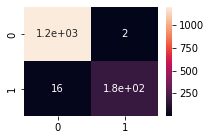

In [19]:
pkg_plot.figure(figsize=(3,2))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)

### Process Data (using Pipeline)

**Model**

In [20]:
classifier = pkg_pipeline.Pipeline([
    ("vectorizer", pkg_text.CountVectorizer()),
    ("model", pkg_naive_bayes.MultinomialNB())
])

In [21]:
# Note, we are giving the "message" (a text field) as train input
# This is OK, because the first step in the pipeline vectorizes the input
classifier.fit(train_inputs, train_outputs)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [22]:
classifier.score(test_inputs, test_outputs)

0.9870782483847811

In [23]:
classifier.predict(sample_messages)

array([0, 1])

In [24]:
classifier_predicted_outputs = classifier.predict(test_inputs)

**Deviation**

In [25]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=classifier_predicted_outputs)
cm

array([[1198,    2],
       [  16,  177]])

<AxesSubplot:>

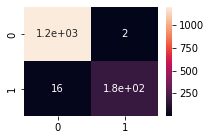

In [26]:
pkg_plot.figure(figsize=(3,2))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)